Лабораторная работа №5

## Градиентный бустинг (Gradient Boosting)

## 2. Создание бейзлайна и оценка качества

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, 
    classification_report, precision_recall_curve, auc
)
import warnings
warnings.filterwarnings('ignore')

Загрузка данных

In [2]:
# Загрузка данных
df_water = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)
df_concrete = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

print(f"Размер данных (вода): {df_water.shape}")
print(f"Размер данных (бетон): {df_concrete.shape}")

Размер данных (вода): (3276, 10)
Размер данных (бетон): (1030, 9)


### 2a. Подготовка данных и обучение baseline моделей

In [3]:
# удаление пропусков для простого baseline
df_water_clean = df_water.dropna()
df_concrete_clean = df_concrete.dropna()

# разделение на признаки и целевую переменную
X_water = df_water_clean.drop('Potability', axis=1)
y_water = df_water_clean['Potability']

X_concrete = df_concrete_clean.iloc[:, :-1]
y_concrete = df_concrete_clean.iloc[:, -1]

# разделение на обучающую и тестовую выборки
X_train_water, X_test_water, y_train_water, y_test_water = train_test_split(
    X_water, y_water, test_size=0.3, random_state=42
)

X_train_concrete, X_test_concrete, y_train_concrete, y_test_concrete = train_test_split(
    X_concrete, y_concrete, test_size=0.3, random_state=42
)

print(f"Классификация - тренировочная: {X_train_water.shape}, тестовая: {X_test_water.shape}")
print(f"Регрессия - тренировочная: {X_train_concrete.shape}, тестовая: {X_test_concrete.shape}")

Классификация - тренировочная: (1407, 9), тестовая: (604, 9)
Регрессия - тренировочная: (721, 8), тестовая: (309, 8)


Обучим модели градиентного бустинга без качественной предобработки данных. Удалим только пропуски, чтобы модель не выдавала ошибку.

In [4]:
# обучение градиентного бустинга для классификации
gb_clf_baseline = GradientBoostingClassifier(random_state=42)
gb_clf_baseline.fit(X_train_water, y_train_water)
y_pred_water_baseline = gb_clf_baseline.predict(X_test_water)
y_pred_proba_water_baseline = gb_clf_baseline.predict_proba(X_test_water)[:, 1]

# обучение градиентного бустинга для регрессии
gb_reg_baseline = GradientBoostingRegressor(random_state=42)
gb_reg_baseline.fit(X_train_concrete, y_train_concrete)
y_pred_concrete_baseline = gb_reg_baseline.predict(X_test_concrete)

### 2b. Оценка качества моделей

Выведем и проанализируем метрики для модели классификации.

Метрики качества (Градиентный бустинг - baseline):
  Accuracy:  0.6440
  Precision: 0.6349
  Recall:    0.3213
  F1-score:  0.4267
  ROC-AUC:   0.6577
  PR-AUC:    0.5968

Матрица ошибок:


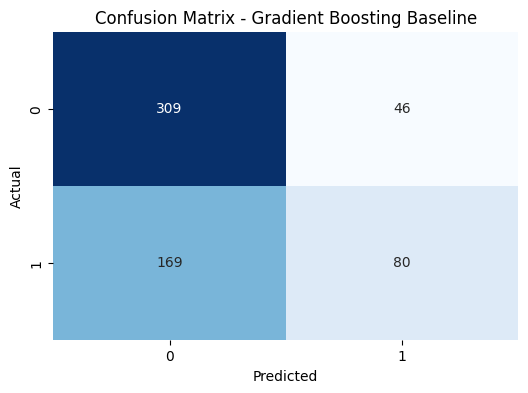


Отчет о классификации:
              precision    recall  f1-score   support

           0       0.65      0.87      0.74       355
           1       0.63      0.32      0.43       249

    accuracy                           0.64       604
   macro avg       0.64      0.60      0.58       604
weighted avg       0.64      0.64      0.61       604



In [5]:
accuracy = accuracy_score(y_test_water, y_pred_water_baseline)
precision = precision_score(y_test_water, y_pred_water_baseline, zero_division=0)
recall = recall_score(y_test_water, y_pred_water_baseline, zero_division=0)
f1 = f1_score(y_test_water, y_pred_water_baseline, zero_division=0)
roc_auc = roc_auc_score(y_test_water, y_pred_proba_water_baseline)
pr_curve = precision_recall_curve(y_test_water, y_pred_proba_water_baseline)
pr_auc = auc(pr_curve[1], pr_curve[0])
cm = confusion_matrix(y_test_water, y_pred_water_baseline)

print(f"Метрики качества (Градиентный бустинг - baseline):")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-score:  {f1:.4f}")
print(f"  ROC-AUC:   {roc_auc:.4f}")
print(f"  PR-AUC:    {pr_auc:.4f}")

print(f"\nМатрица ошибок:")
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Gradient Boosting Baseline')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\nОтчет о классификации:")
print(classification_report(y_test_water, y_pred_water_baseline))

*Метрики градиентного бустинга на сырых данных показывают хорошие результаты, но пока хуже случайного леса.*

#### Оценка качества модели регрессии

In [6]:
mse = mean_squared_error(y_test_concrete, y_pred_concrete_baseline)
mae = mean_absolute_error(y_test_concrete, y_pred_concrete_baseline)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_concrete, y_pred_concrete_baseline)

print(f"Метрики качества (Градиентный бустинг - baseline):")
print(f"  MSE:  {mse:.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")

Метрики качества (Градиентный бустинг - baseline):
  MSE:  29.4198
  MAE:  4.0261
  RMSE: 5.4240
  R²:   0.8913


*Метрики регрессии показывают отличные результаты, но они хуже чем у случайного леса.*

#### Визуализация результатов baseline подхода

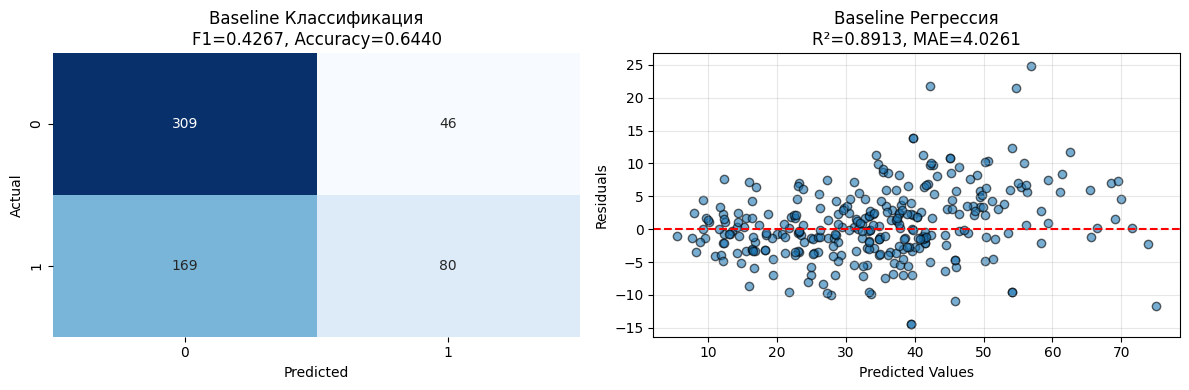

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# матрица ошибок для классификации
cm_baseline_clf = confusion_matrix(y_test_water, y_pred_water_baseline)
sns.heatmap(cm_baseline_clf, annot=True, fmt='d', ax=axes[0], cmap='Blues', cbar=False)
axes[0].set_title(f'Baseline Классификация\nF1={f1:.4f}, Accuracy={accuracy:.4f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# график остатков для регрессии
residuals_baseline_reg = y_test_concrete - y_pred_concrete_baseline
axes[1].scatter(y_pred_concrete_baseline, residuals_baseline_reg, alpha=0.6, edgecolors='k')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title(f'Baseline Регрессия\nR²={r2:.4f}, MAE={mae:.4f}')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Улучшение бейзлайна

### 3a. Формулирование гипотез улучшения

**Гипотеза 1:** Заполнение пропусков медианой улучшит качество моделей

**Гипотеза 2:** Стандартизация признаков может повлиять на качество градиентного бустинга

**Гипотеза 3:** Подбор оптимальных гиперпараметров (n_estimators, max_depth, learning_rate) улучшит результаты

**Гипотеза 4:** Удаление выбросов методом IQR улучшит качество модели

**Гипотеза 5:** Создание новых признаков

### 3b. Проверка гипотез

#### Гипотеза 1: Заполнение пропусков медианой

Проверим гипотезу 1 для классификации.

Классификация (с заполнением пропусков):
  Accuracy:  0.7843
  F1-score:  0.6536
  ROC-AUC:   0.8619
  PR-AUC:    0.8132

Матрица ошибок:


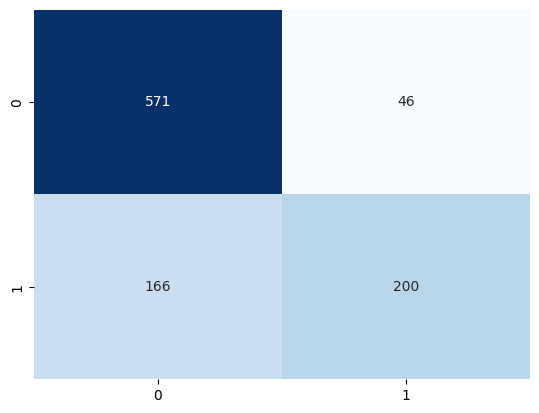


Метрики качества (Градиентный бустинг - baseline):
  Accuracy:  0.6440
  F1-score:  0.4267
  ROC-AUC:   0.6577
  PR-AUC:    0.5968


In [8]:
# загрузка данных заново
df_water_hyp1 = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)

# заполнение пропусков медианой по классам для классификации
df_water_hyp1['ph'] = df_water_hyp1.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.median()))
df_water_hyp1['Sulfate'] = df_water_hyp1.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.median()))
df_water_hyp1['Trihalomethanes'] = df_water_hyp1.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.median()))

# разделение на признаки и целевую переменную
X_water_hyp1 = df_water_hyp1.drop('Potability', axis=1)
y_water_hyp1 = df_water_hyp1['Potability']

# разделение на train/test
X_train_water_h1, X_test_water_h1, y_train_water_h1, y_test_water_h1 = train_test_split(
    X_water_hyp1, y_water_hyp1, test_size=0.3, random_state=42
)

# обучение модели
gb_clf_hyp1 = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_clf_hyp1.fit(X_train_water_h1, y_train_water_h1)
y_pred_water_h1 = gb_clf_hyp1.predict(X_test_water_h1)
y_pred_proba_water_h1 = gb_clf_hyp1.predict_proba(X_test_water_h1)[:, 1]

# метрики для классификации
acc_h1 = accuracy_score(y_test_water_h1, y_pred_water_h1)
f1_h1 = f1_score(y_test_water_h1, y_pred_water_h1, zero_division=0)
roc_auc_h1 = roc_auc_score(y_test_water_h1, y_pred_proba_water_h1)
pr_curve_h1 = precision_recall_curve(y_test_water_h1, y_pred_proba_water_h1)
pr_auc_h1 = auc(pr_curve_h1[1], pr_curve_h1[0])

cm_hyp1 = confusion_matrix(y_test_water_h1, y_pred_water_h1)

print(f"Классификация (с заполнением пропусков):")
print(f"  Accuracy:  {acc_h1:.4f}")
print(f"  F1-score:  {f1_h1:.4f}")
print(f"  ROC-AUC:   {roc_auc_h1:.4f}")
print(f"  PR-AUC:    {pr_auc_h1:.4f}")

print(f"\nМатрица ошибок:")
sns.heatmap(cm_hyp1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()

print(f"\nМетрики качества (Градиентный бустинг - baseline):")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  F1-score:  {f1:.4f}")
print(f"  ROC-AUC:   {roc_auc:.4f}")
print(f"  PR-AUC:    {pr_auc:.4f}")

*Заполнение пропусков медианой значительно улучшило метрики модели градиентного бустинга для классификации.*

Для регрессии не будем проверять эту гипотезу, так как в данных нет пропусков.

### Гипотеза 2: Стандартизация признаков

Проверим гшипотезу 2 для классификации.

In [9]:
X_tr_std = X_train_water_h1.copy()
X_te_std = X_test_water_h1.copy()

# Выбираем числовые признаки и масштабируем их
num_cols = X_tr_std.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
scaler.fit(X_tr_std[num_cols])
X_tr_std[num_cols] = scaler.transform(X_tr_std[num_cols])
X_te_std[num_cols] = scaler.transform(X_te_std[num_cols])


gb_clf_h2 = GradientBoostingClassifier(random_state=42)
gb_clf_h2.fit(X_tr_std, y_train_water_h1)
y_pred_h2 = gb_clf_h2.predict(X_te_std)
y_proba_h2 = gb_clf_h2.predict_proba(X_te_std)[:, 1]

# Метрики
acc_h2 = accuracy_score(y_test_water_h1, y_pred_h2)
f1_h2 = f1_score(y_test_water_h1, y_pred_h2, zero_division=0)
roc_auc_h2 = roc_auc_score(y_test_water_h1, y_proba_h2)
pr_h2 = precision_recall_curve(y_test_water_h1, y_proba_h2)
pr_auc_h2 = auc(pr_h2[1], pr_h2[0])
cm_h2 = confusion_matrix(y_test_water_h1, y_pred_h2)


print(f'  Гипотеза 2: Accuracy={acc_h2:.4f}, F1={f1_h2:.4f}, ROC-AUC={roc_auc_h2:.4f}, PR-AUC={pr_auc_h2:.4f}')
print(f'  Гипотеза 1: Accuracy={acc_h1:.4f}, F1={f1_h1:.4f}, ROC-AUC={roc_auc_h1:.4f}, PR-AUC={pr_auc_h1:.4f}')

  Гипотеза 2: Accuracy=0.7843, F1=0.6536, ROC-AUC=0.8619, PR-AUC=0.8132
  Гипотеза 1: Accuracy=0.7843, F1=0.6536, ROC-AUC=0.8619, PR-AUC=0.8132


*Метрики не изменились, значит отдельное масштабирование признаков не требуется для данной модели.*

Проверим гипотезу 2 для регресии

In [10]:
X_tr_std = X_train_concrete.copy()
X_te_std = X_test_concrete.copy()

# Выбираем числовые признаки и масштабируем их
num_cols = X_tr_std.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
scaler.fit(X_tr_std[num_cols])
X_tr_std[num_cols] = scaler.transform(X_tr_std[num_cols])
X_te_std[num_cols] = scaler.transform(X_te_std[num_cols])


gb_reg_h2 = GradientBoostingRegressor(random_state=42)
gb_reg_h2.fit(X_tr_std, y_train_concrete)
y_pred_h2 = gb_reg_h2.predict(X_te_std)

# метрики
mae_h2 = mean_absolute_error(y_test_concrete, y_pred_h2)
mse_h2 = mean_squared_error(y_test_concrete, y_pred_h2)
r2_h2 = r2_score(y_test_concrete, y_pred_h2)


print(f'  Гипотеза 2: MAE={mae_h2:.4f}, MSE={mse_h2:.4f}, R^2={r2_h2:.4f}')
print(f'  Гипотеза 1: MAE={mae:.4f}, MSE={mse:.4f}, R^2={r2:.4f}')

  Гипотеза 2: MAE=4.0261, MSE=29.4198, R^2=0.8913
  Гипотеза 1: MAE=4.0261, MSE=29.4198, R^2=0.8913


*Масштабирование признаков не дало улучшений метрик для регрессии.*

### Гипотеза 3: Подбор гиперпараметров

Проверим гипотезу 3 для классификации.

In [11]:
# подбор гиперпараметров для градиентного бустинга с RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb = GradientBoostingClassifier(random_state=42)

rs = RandomizedSearchCV(gb, param_dist, n_iter=20, scoring='f1', cv=5, random_state=42, n_jobs=-1)
rs.fit(X_train_water_h1, y_train_water_h1)

best_params = rs.best_params_
best_cv_score = rs.best_score_

print(f"Оптимальные параметры: {best_params}")
print(f"CV F1-score: {best_cv_score:.4f}")

# обучение с найденными параметрами
gb_clf_hyp3 = GradientBoostingClassifier(**best_params, random_state=42)
gb_clf_hyp3.fit(X_train_water_h1, y_train_water_h1)
y_pred_water_h3 = gb_clf_hyp3.predict(X_test_water_h1)
y_pred_proba_water_h3 = gb_clf_hyp3.predict_proba(X_test_water_h1)[:, 1]

acc_h3 = accuracy_score(y_test_water_h1, y_pred_water_h3)
f1_h3 = f1_score(y_test_water_h1, y_pred_water_h3, zero_division=0)
roc_auc_h3 = roc_auc_score(y_test_water_h1, y_pred_proba_water_h3)
pr_curve_h3 = precision_recall_curve(y_test_water_h1, y_pred_proba_water_h3)
pr_auc_h3 = auc(pr_curve_h3[1], pr_curve_h3[0])

print(f"По умолчанию (гипотеза1): Accuracy={acc_h1:.4f}, F1={f1_h1:.4f}, ROC-AUC={roc_auc_h1:.4f}")
print(f"С подбором параметров: Accuracy={acc_h3:.4f}, F1={f1_h3:.4f}, ROC-AUC={roc_auc_h3:.4f}")

Оптимальные параметры: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.1}
CV F1-score: 0.7040
По умолчанию (гипотеза1): Accuracy=0.7843, F1=0.6536, ROC-AUC=0.8619
С подбором параметров: Accuracy=0.7915, F1=0.6889, ROC-AUC=0.8659


*Подбор гиперпараметров улучшил метрики модели градиентного бустинга для классификации.*

Проверим гипотезу 3 для регрессии.

Оптимальные параметры (регрессия): {'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.1}
CV R2-score: 0.9142
Результаты (регрессия) — с подбором гиперпараметров:
  MAE:  3.0378
  RMSE: 4.3476
  MSE:  18.9020
  R²:   0.9301

Сравнение с baseline (gb_reg_baseline):
  baseline MAE:  4.0261
  baseline RMSE: 5.4240
  baseline MSE:  29.4198
  baseline R²:   0.8913


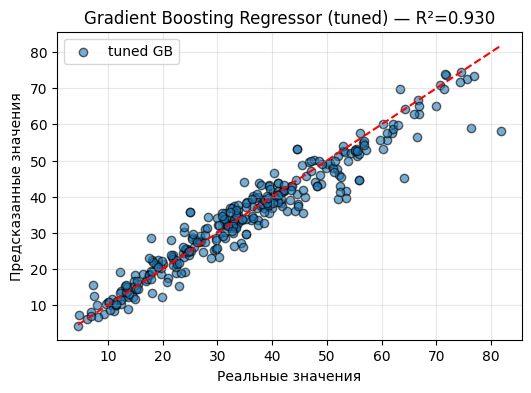

In [12]:
# подбор оптимальных гиперпараметров для градиентного бустинга (регрессия)
from sklearn.model_selection import RandomizedSearchCV

param_dist_reg = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10, None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_reg = GradientBoostingRegressor(random_state=42)

rs_reg = RandomizedSearchCV(gb_reg, param_dist_reg, n_iter=30, scoring='r2', cv=5, random_state=42, n_jobs=-1)
rs_reg.fit(X_train_concrete, y_train_concrete)

best_params_reg = rs_reg.best_params_
best_cv_score_reg = rs_reg.best_score_

print(f"Оптимальные параметры (регрессия): {best_params_reg}")
print(f"CV R2-score: {best_cv_score_reg:.4f}")

# обучение с найденными параметрами
# если max_depth==None, sklearn будет принимать None; GradientBoostingRegressor принимает None
gb_reg_hyp3 = GradientBoostingRegressor(**best_params_reg, random_state=42)
gb_reg_hyp3.fit(X_train_concrete, y_train_concrete)
y_pred_concrete_h3 = gb_reg_hyp3.predict(X_test_concrete)

# метрики
mae_h3 = mean_absolute_error(y_test_concrete, y_pred_concrete_h3)
mse_h3 = mean_squared_error(y_test_concrete, y_pred_concrete_h3)
rmse_h3 = np.sqrt(mse_h3)
r2_h3 = r2_score(y_test_concrete, y_pred_concrete_h3)

print("Результаты (регрессия) — с подбором гиперпараметров:")
print(f"  MAE:  {mae_h3:.4f}")
print(f"  RMSE: {rmse_h3:.4f}")
print(f"  MSE:  {mse_h3:.4f}")
print(f"  R²:   {r2_h3:.4f}")

print("\nСравнение с baseline (gb_reg_baseline):")
print(f"  baseline MAE:  {mae:.4f}")
print(f"  baseline RMSE: {np.sqrt(mse):.4f}")
print(f"  baseline MSE:  {mse:.4f}")
print(f"  baseline R²:   {r2:.4f}")

# Визуализация: предсказания vs реальные значения
plt.figure(figsize=(6,4))
plt.scatter(y_test_concrete, y_pred_concrete_h3, alpha=0.6, edgecolors='k', label='tuned GB')
plt.plot([y_test_concrete.min(), y_test_concrete.max()], [y_test_concrete.min(), y_test_concrete.max()], 'r--')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Gradient Boosting Regressor (tuned) — R²={r2_h3:.3f}')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

*Метрики регрессии улучшились, подбор гиперпараметров улучшил модель.*

### Гипотеза 4: Удаление выбросов методом IQR

Проверим гипотезу 4 для классификации.

In [13]:
def remove_outliers_iqr(X: pd.DataFrame, y: pd.Series = None, factor: float = 1.5):
    numeric = X.select_dtypes(include=[np.number])
    Q1 = numeric.quantile(0.25)
    Q3 = numeric.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    mask = ((numeric >= lower) & (numeric <= upper)).all(axis=1)
    X_clean = X.loc[mask].copy()
    if y is None:
        return X_clean, mask
    return X_clean, y.loc[mask].copy(), mask

Классификация - до удаления выбросов: (2293, 9), после: (1856, 9) (удалено 437 строк)
Метрики классификации после удаления выбросов:
  Accuracy:  0.7721
  Precision: 0.7630
  Recall:    0.5628
  F1-score:  0.6478
  ROC-AUC:   0.8542
  PR-AUC:    0.8060
Сравнение с предыдущими гипотезами (если доступны):
  Гипотеза1 (заполнение): Accuracy=0.7843, F1=0.6536, ROC-AUC=0.8619
  Гипотеза3 (Подбор гиперпараметров): Accuracy=0.7915, F1=0.6889, ROC-AUC=0.8659


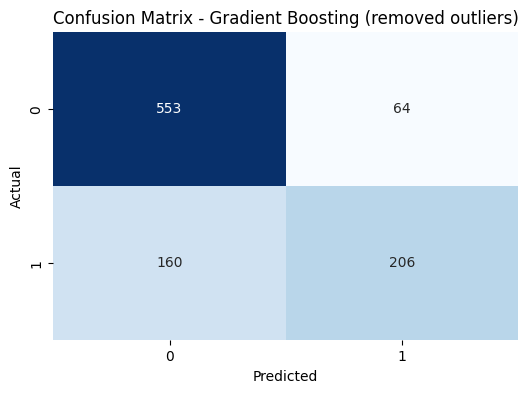

In [14]:
# подготовка данных (гарантируем DataFrame/Series)
X_temp = pd.DataFrame(X_train_water_h1).copy()
y_temp = pd.Series(y_train_water_h1, index=X_temp.index)

# удаление выбросов методом IQR
X_train_water_h4, y_train_water_h4, mask_w = remove_outliers_iqr(X_temp, y_temp, factor=1.5)
removed = len(X_temp) - len(X_train_water_h4)
print(f"Классификация - до удаления выбросов: {X_temp.shape}, после: {X_train_water_h4.shape} (удалено {removed} строк)")


# обучаем модель на очищенных данных
gb_clf_hyp4 = GradientBoostingClassifier(**best_params, random_state=42)
gb_clf_hyp4.fit(X_train_water_h4, y_train_water_h4)

# предсказания на тестовой выборке (тестовую выборку не очищаем)
y_pred_water_h4 = gb_clf_hyp4.predict(X_test_water_h1)
y_pred_proba_water_h4 = gb_clf_hyp4.predict_proba(X_test_water_h1)[:, 1]

# метрики
acc_h4 = accuracy_score(y_test_water_h1, y_pred_water_h4)
precision_h4 = precision_score(y_test_water_h1, y_pred_water_h4, zero_division=0)
recall_h4 = recall_score(y_test_water_h1, y_pred_water_h4, zero_division=0)
f1_h4 = f1_score(y_test_water_h1, y_pred_water_h4, zero_division=0)
roc_auc_h4 = roc_auc_score(y_test_water_h1, y_pred_proba_water_h4)
pr_curve_h4 = precision_recall_curve(y_test_water_h1, y_pred_proba_water_h4)
pr_auc_h4 = auc(pr_curve_h4[1], pr_curve_h4[0])
cm_h4 = confusion_matrix(y_test_water_h1, y_pred_water_h4)

print("Метрики классификации после удаления выбросов:")
print(f"  Accuracy:  {acc_h4:.4f}")
print(f"  Precision: {precision_h4:.4f}")
print(f"  Recall:    {recall_h4:.4f}")
print(f"  F1-score:  {f1_h4:.4f}")
print(f"  ROC-AUC:   {roc_auc_h4:.4f}")
print(f"  PR-AUC:    {pr_auc_h4:.4f}")

# Сравнение с предыдущими вариантами (если есть)
print("Сравнение с предыдущими гипотезами (если доступны):")
print(f"  Гипотеза1 (заполнение): Accuracy={acc_h1:.4f}, F1={f1_h1:.4f}, ROC-AUC={roc_auc_h1:.4f}")
print(f"  Гипотеза3 (Подбор гиперпараметров): Accuracy={acc_h3:.4f}, F1={f1_h3:.4f}, ROC-AUC={roc_auc_h3:.4f}")

# Визуализация: матрица ошибок
plt.figure(figsize=(6,4))
sns.heatmap(cm_h4, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Gradient Boosting (removed outliers)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

*После удаления выборосов метрики ухудшились, значит выбросы содержат полезную информацию.*

Проверим гипотезу 4 для регрессии.

Регрессия - до удаления выбросов: (721, 8), после: (660, 8) (удалено 61 строк)
Метрики регрессии после удаления выбросов:
  MAE:   3.3074
  RMSE:  4.6831
  MSE:   21.9315
  R²:    0.9189
Сравнение с baseline (gb_reg_baseline):
  baseline MAE:   4.0261
  baseline RMSE:  5.4240
  baseline MSE:   29.4198
  baseline R²:    0.8913


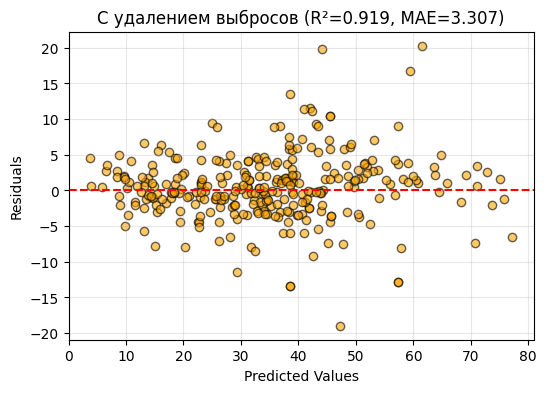

In [15]:
# подготовка данных (гарантируем DataFrame/Series)
X_temp_c = pd.DataFrame(X_train_concrete).copy()
y_temp_c = pd.Series(y_train_concrete, index=X_temp_c.index)

# удаление выбросов методом IQR
X_train_concrete_h4, y_train_concrete_h4, mask_c = remove_outliers_iqr(X_temp_c, y_temp_c, factor=1.5)
removed_c = len(X_temp_c) - len(X_train_concrete_h4)

print(f"Регрессия - до удаления выбросов: {X_temp_c.shape}, после: {X_train_concrete_h4.shape} (удалено {removed_c} строк)")

gb_reg_hyp4 = GradientBoostingRegressor(**best_params_reg, random_state=42)
gb_reg_hyp4.fit(X_train_concrete_h4, y_train_concrete_h4)

# предсказания на тестовой выборке (тестовую выборку не очищаем)
y_pred_concrete_h4 = gb_reg_hyp4.predict(X_test_concrete)

# метрики
mae_h4 = mean_absolute_error(y_test_concrete, y_pred_concrete_h4)
mse_h4 = mean_squared_error(y_test_concrete, y_pred_concrete_h4)
rmse_h4 = np.sqrt(mse_h4)
r2_h4 = r2_score(y_test_concrete, y_pred_concrete_h4)

print("Метрики регрессии после удаления выбросов:")
print(f"  MAE:   {mae_h4:.4f}")
print(f"  RMSE:  {rmse_h4:.4f}")
print(f"  MSE:   {mse_h4:.4f}")
print(f"  R²:    {r2_h4:.4f}")

# сравнение с baseline (если доступно)
print('Сравнение с baseline (gb_reg_baseline):')
print(f"  baseline MAE:   {mae:.4f}")
print(f"  baseline RMSE:  {rmse:.4f}")
print(f"  baseline MSE:   {mse:.4f}")
print(f"  baseline R²:    {r2:.4f}")

# визуализация: остатки (residuals)
plt.figure(figsize=(6,4))
residuals_h4 = y_test_concrete - y_pred_concrete_h4
plt.scatter(y_pred_concrete_h4, residuals_h4, alpha=0.6, edgecolors='k', color='orange')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f'С удалением выбросов (R²={r2_h4:.3f}, MAE={mae_h4:.3f})')
plt.grid(alpha=0.3)
plt.show()

*После удаления выбросов метрики улучшились по сравнению с baseline, но при подборе гиперпараметров метрики намногог лучше.*

### Гипотеза 5: Создание новых признаков

Проверим гипоттезу 5 для классификации.

In [16]:
# загрузим данные заново для новых признаков
df_water_fe = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)

# заполнение пропусков медианой по классам
df_water_fe['ph'] = df_water_fe.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.median()))
df_water_fe['Sulfate'] = df_water_fe.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.median()))
df_water_fe['Trihalomethanes'] = df_water_fe.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.median()))

# разделяем на признаки и целевую переменную
X_water_fe = df_water_fe.drop('Potability', axis=1)
y_water_fe = df_water_fe['Potability']

# создание новых признаков
X_water_fe_extended = X_water_fe.copy()

# взаимодействие признаков
X_water_fe_extended['ph_sulfate'] = X_water_fe_extended['ph'] * X_water_fe_extended['Sulfate']
X_water_fe_extended['ph_turbidity'] = X_water_fe_extended['ph'] * X_water_fe_extended['Turbidity']
X_water_fe_extended['conductivity_sulfate'] = X_water_fe_extended['Conductivity'] * X_water_fe_extended['Sulfate']

# полиномиальные признаки
X_water_fe_extended['ph_squared'] = X_water_fe_extended['ph'] ** 2
X_water_fe_extended['conductivity_squared'] = X_water_fe_extended['Conductivity'] ** 2
X_water_fe_extended['organic_carbon_squared'] = X_water_fe_extended['Organic_carbon'] ** 2

# статистические признаки
X_water_fe_extended['feature_mean'] = X_water_fe_extended.mean(axis=1)
X_water_fe_extended['feature_std'] = X_water_fe_extended.std(axis=1)
X_water_fe_extended['feature_max'] = X_water_fe_extended.max(axis=1)
X_water_fe_extended['feature_min'] = X_water_fe_extended.min(axis=1)

# отношения между признаками (безопасность - деление на ноль)
X_water_fe_extended['ph_conductivity_ratio'] = X_water_fe_extended['ph'] / (X_water_fe_extended['Conductivity'] + 1e-6)
X_water_fe_extended['sulfate_turbidity_ratio'] = X_water_fe_extended['Sulfate'] / (X_water_fe_extended['Turbidity'] + 1e-6)

print(f"Исходное количество признаков: {X_water_fe.shape[1]}")
print(f"Количество признаков после инженерии: {X_water_fe_extended.shape[1]}")
print(f"\nНовые признаки: {list(X_water_fe_extended.columns[X_water_fe.shape[1]:])}")

Исходное количество признаков: 9
Количество признаков после инженерии: 21

Новые признаки: ['ph_sulfate', 'ph_turbidity', 'conductivity_sulfate', 'ph_squared', 'conductivity_squared', 'organic_carbon_squared', 'feature_mean', 'feature_std', 'feature_max', 'feature_min', 'ph_conductivity_ratio', 'sulfate_turbidity_ratio']


In [17]:
# разделение на train/test с новыми признаками
X_train_water_fe, X_test_water_fe, y_train_water_fe, y_test_water_fe = train_test_split(
    X_water_fe_extended, y_water_fe, test_size=0.3, random_state=42
)

# обучение случайного леса с новыми признаками
rf_clf_fe = GradientBoostingClassifier(random_state=42, **best_params)
rf_clf_fe.fit(X_train_water_fe, y_train_water_fe)
y_pred_water_fe = rf_clf_fe.predict(X_test_water_fe)
y_pred_proba_water_fe = rf_clf_fe.predict_proba(X_test_water_fe)[:, 1]

# вычисление метрик
acc_fe = accuracy_score(y_test_water_fe, y_pred_water_fe)
f1_fe = f1_score(y_test_water_fe, y_pred_water_fe, zero_division=0)
roc_auc_fe = roc_auc_score(y_test_water_fe, y_pred_proba_water_fe)
pr_curve_fe = precision_recall_curve(y_test_water_fe, y_pred_proba_water_fe)
pr_auc_fe = auc(pr_curve_fe[1], pr_curve_fe[0])
precision_fe = precision_score(y_test_water_fe, y_pred_water_fe, zero_division=0)
recall_fe = recall_score(y_test_water_fe, y_pred_water_fe, zero_division=0)

print(f"Метрики качества (с новыми признаками):")
print(f"  Accuracy:  {acc_fe:.4f}")
print(f"  Precision: {precision_fe:.4f}")
print(f"  Recall:    {recall_fe:.4f}")
print(f"  F1-score:  {f1_fe:.4f}")
print(f"  ROC-AUC:   {roc_auc_fe:.4f}")
print(f"  PR-AUC:    {pr_auc_fe:.4f}")

print(f"\nМетрики качества (Гипотеза 3):")
print(f"  Accuracy:  {acc_h3:.4f}")
print(f"  F1-score:  {f1_h3:.4f}")
print(f"  ROC-AUC:   {roc_auc_h3:.4f}")
print(f"  PR-AUC:    {pr_auc_h3:.4f}")

Метрики качества (с новыми признаками):
  Accuracy:  0.7904
  Precision: 0.7797
  Recall:    0.6093
  F1-score:  0.6840
  ROC-AUC:   0.8706
  PR-AUC:    0.8246

Метрики качества (Гипотеза 3):
  Accuracy:  0.7915
  F1-score:  0.6889
  ROC-AUC:   0.8659
  PR-AUC:    0.8195


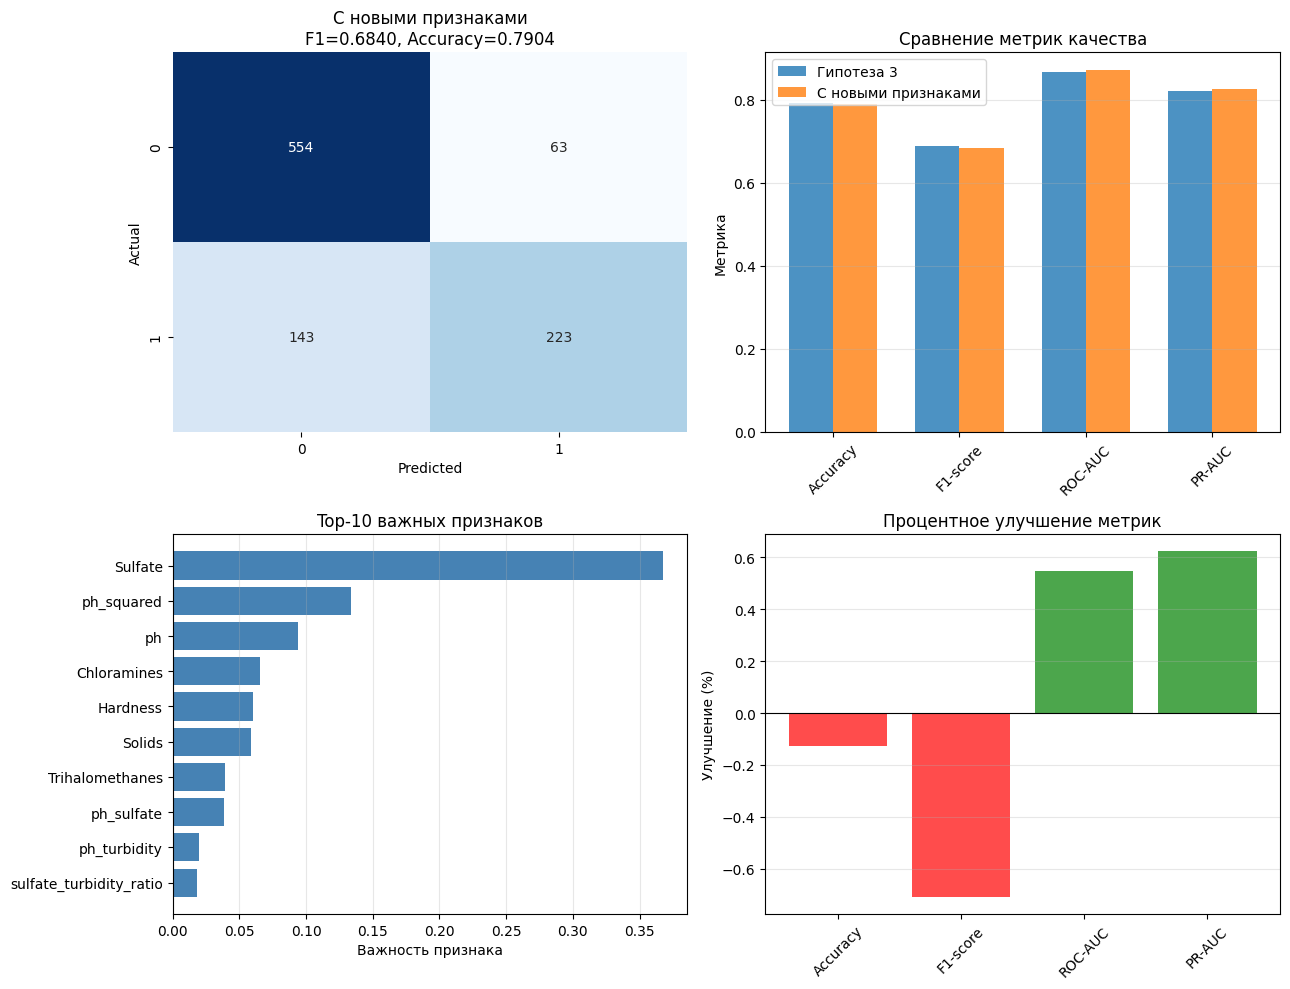

In [18]:
# визуализация результатов с новыми признаками
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

# матрица ошибок для модели с новыми признаками
cm_fe = confusion_matrix(y_test_water_fe, y_pred_water_fe)
sns.heatmap(cm_fe, annot=True, fmt='d', ax=axes[0, 0], cmap='Blues', cbar=False)
axes[0, 0].set_title(f'С новыми признаками\nF1={f1_fe:.4f}, Accuracy={acc_fe:.4f}')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# сравнение метрик
metrics_names = ['Accuracy', 'F1-score', 'ROC-AUC', 'PR-AUC']
hyp3_metrics = [acc_h3, f1_h3, roc_auc_h3, pr_auc_h3]
fe_metrics = [acc_fe, f1_fe, roc_auc_fe, pr_auc_fe]

x = np.arange(len(metrics_names))
width = 0.35

axes[0, 1].bar(x - width/2, hyp3_metrics, width, label='Гипотеза 3', alpha=0.8)
axes[0, 1].bar(x + width/2, fe_metrics, width, label='С новыми признаками', alpha=0.8)
axes[0, 1].set_ylabel('Метрика')
axes[0, 1].set_title('Сравнение метрик качества')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(metrics_names, rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3, axis='y')

# важность признаков
feature_importance = rf_clf_fe.feature_importances_
top_indices = np.argsort(feature_importance)[-10:]
top_features = [X_water_fe_extended.columns[i] for i in top_indices]
top_importance = feature_importance[top_indices]

axes[1, 0].barh(top_features, top_importance, color='steelblue')
axes[1, 0].set_xlabel('Важность признака')
axes[1, 0].set_title('Top-10 важных признаков')
axes[1, 0].grid(alpha=0.3, axis='x')

# увеличение метрик
improvement = [(fe_metrics[i] - hyp3_metrics[i]) / hyp3_metrics[i] * 100 
               for i in range(len(metrics_names))]
colors = ['green' if x > 0 else 'red' for x in improvement]
axes[1, 1].bar(metrics_names, improvement, color=colors, alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 1].set_ylabel('Улучшение (%)')
axes[1, 1].set_title('Процентное улучшение метрик')
axes[1, 1].set_xticklabels(metrics_names, rotation=45)
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

*Создание новых признаков не улучшило качество модели классификации, метрики практически не изменились.*

Проверим гипотезу 5 для регрессии.

In [19]:
# загрузим данные заново для создания новых признаков
df_concrete_fe = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

# отделяем признаки и целевую переменную
X_concrete_fe = df_concrete_fe.iloc[:, :-1]
y_concrete_fe = df_concrete_fe.iloc[:, -1]

# создание новых признаков
X_concrete_fe_extended = X_concrete_fe.copy()

# взаимодействие признаков (основные компоненты смеси)
X_concrete_fe_extended['cement_water'] = X_concrete_fe_extended['cement'] * X_concrete_fe_extended['water']
X_concrete_fe_extended['cement_slag'] = X_concrete_fe_extended['cement'] * X_concrete_fe_extended['slag']
X_concrete_fe_extended['cement_ash'] = X_concrete_fe_extended['cement'] * X_concrete_fe_extended['flyash']
X_concrete_fe_extended['slag_ash'] = X_concrete_fe_extended['slag'] * X_concrete_fe_extended['flyash']
X_concrete_fe_extended['water_superplasticizer'] = X_concrete_fe_extended['water'] * X_concrete_fe_extended['superplasticizer']
# полиномиальные признаки
X_concrete_fe_extended['cement_squared'] = X_concrete_fe_extended['cement'] ** 2
X_concrete_fe_extended['water_squared'] = X_concrete_fe_extended['water'] ** 2
X_concrete_fe_extended['slag_squared'] = X_concrete_fe_extended['slag'] ** 2
X_concrete_fe_extended['age_squared'] = X_concrete_fe_extended['age'] ** 2
X_concrete_fe_extended['age_cubed'] = X_concrete_fe_extended['age'] ** 3

# отношения между признаками
X_concrete_fe_extended['cement_water_ratio'] = X_concrete_fe_extended['cement'] / (X_concrete_fe_extended['water'] + 1e-6)
X_concrete_fe_extended['total_binders'] = (X_concrete_fe_extended['cement'] + 
                                            X_concrete_fe_extended['slag'] + 
                                            X_concrete_fe_extended['flyash'])
X_concrete_fe_extended['binder_water_ratio'] = X_concrete_fe_extended['total_binders'] / (X_concrete_fe_extended['water'] + 1e-6)

# статистические признаки
X_concrete_fe_extended['component_mean'] = X_concrete_fe_extended[['cement', 'slag', 'flyash', 'water']].mean(axis=1)
X_concrete_fe_extended['component_max'] = X_concrete_fe_extended[['cement', 'slag', 'flyash', 'water']].max(axis=1)

print(f"Исходное количество признаков: {X_concrete_fe.shape[1]}")
print(f"Количество признаков после добавления: {X_concrete_fe_extended.shape[1]}")
print(f"\nНовые признаки: {list(X_concrete_fe_extended.columns[X_concrete_fe.shape[1]:])}")

Исходное количество признаков: 8
Количество признаков после добавления: 23

Новые признаки: ['cement_water', 'cement_slag', 'cement_ash', 'slag_ash', 'water_superplasticizer', 'cement_squared', 'water_squared', 'slag_squared', 'age_squared', 'age_cubed', 'cement_water_ratio', 'total_binders', 'binder_water_ratio', 'component_mean', 'component_max']


In [20]:

# разделение на train/test с новыми признаками
X_train_concrete_fe, X_test_concrete_fe, y_train_concrete_fe, y_test_concrete_fe = train_test_split(
    X_concrete_fe_extended, y_concrete_fe, test_size=0.3, random_state=42
)

# обучение случайного леса с новыми признаками
rf_reg_fe = GradientBoostingRegressor(random_state=42, **best_params_reg)
rf_reg_fe.fit(X_train_concrete_fe, y_train_concrete_fe)
y_pred_concrete_fe = rf_reg_fe.predict(X_test_concrete_fe)

# вычисление метрик
mae_fe = mean_absolute_error(y_test_concrete_fe, y_pred_concrete_fe)
rmse_fe = np.sqrt(mean_squared_error(y_test_concrete_fe, y_pred_concrete_fe))
mse_fe = mean_squared_error(y_test_concrete_fe, y_pred_concrete_fe)
r2_fe = r2_score(y_test_concrete_fe, y_pred_concrete_fe)

print(f"Метрики качества (с новыми признаками):")
print(f"  MAE:   {mae_fe:.4f}")
print(f"  RMSE:  {rmse_fe:.4f}")
print(f"  MSE:   {mse_fe:.4f}")
print(f"  R²:    {r2_fe:.4f}")

print(f"\nМетрики качества (Гипотеза 4):")
print(f"  MAE:   {mae_h4:.4f}")
print(f"  RMSE:  {rmse_h4:.4f}")
print(f"  MSE:   {mse_h4:.4f}")
print(f"  R²:    {r2_h4:.4f}")

Метрики качества (с новыми признаками):
  MAE:   2.9555
  RMSE:  4.2100
  MSE:   17.7237
  R²:    0.9345

Метрики качества (Гипотеза 4):
  MAE:   3.3074
  RMSE:  4.6831
  MSE:   21.9315
  R²:    0.9189


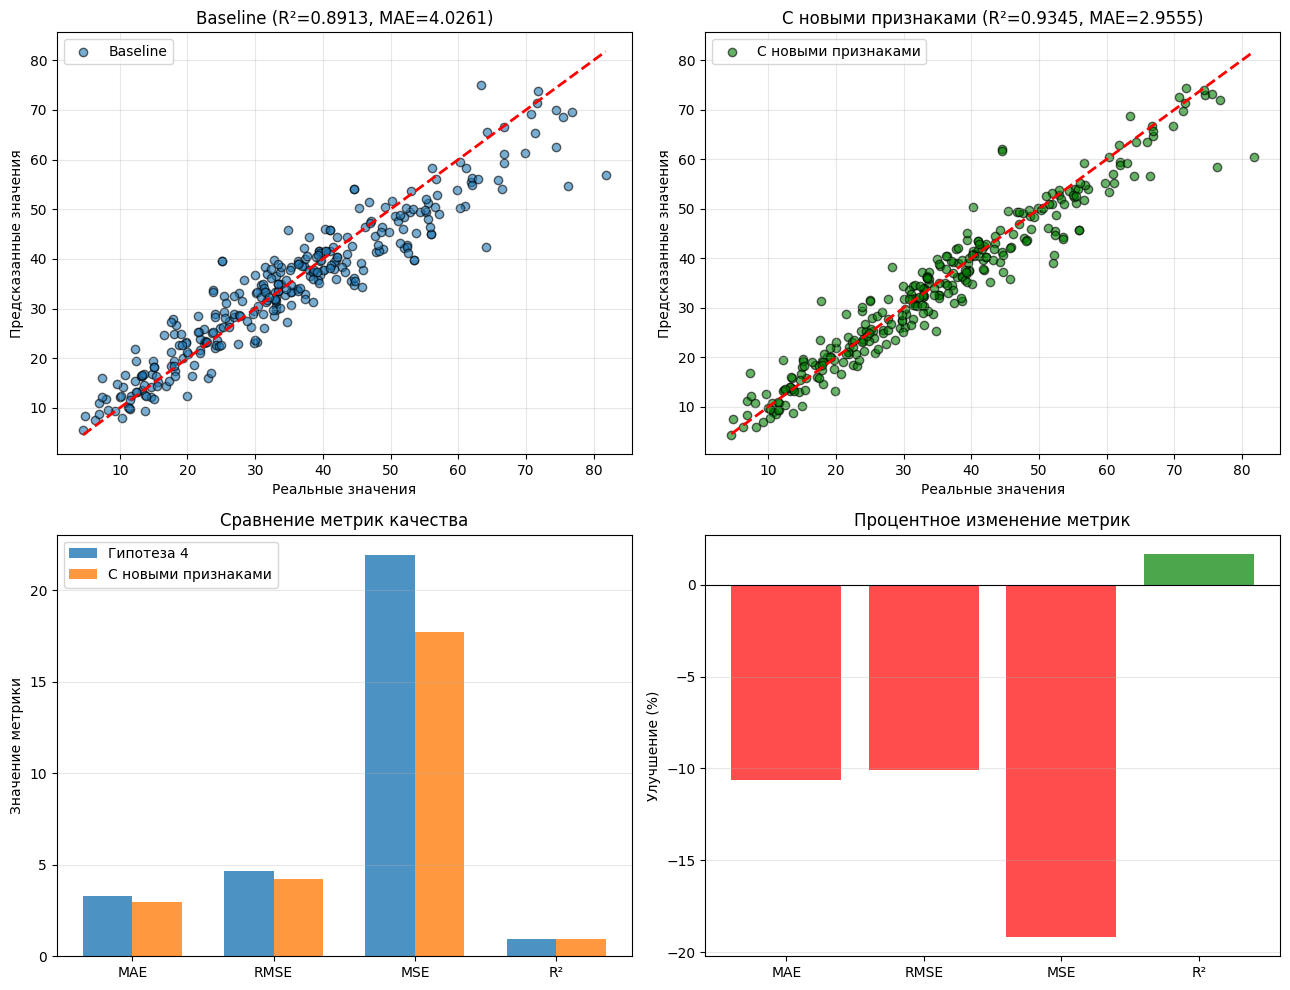

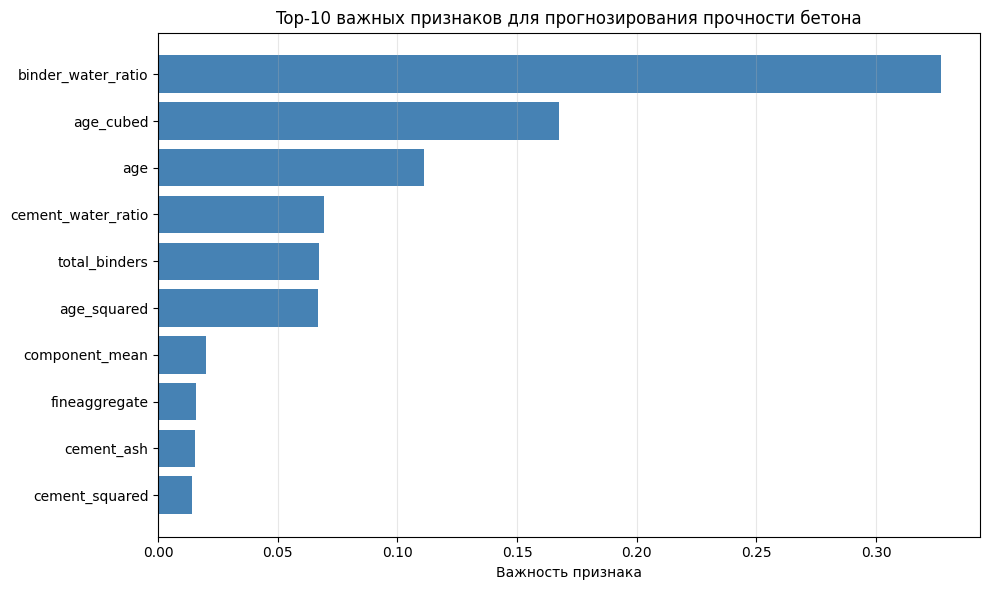

In [21]:
# визуализация результатов создания признаков для регрессии
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

# график предсказаний vs реальные значения (baseline)
axes[0, 0].scatter(y_test_concrete, y_pred_concrete_baseline, alpha=0.6, edgecolors='k', label='Baseline')
axes[0, 0].plot([y_test_concrete.min(), y_test_concrete.max()], 
                [y_test_concrete.min(), y_test_concrete.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Реальные значения')
axes[0, 0].set_ylabel('Предсказанные значения')
axes[0, 0].set_title(f'Baseline (R²={r2:.4f}, MAE={mae:.4f})')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].legend()

# график предсказаний vs реальные значения (с инженерией)
axes[0, 1].scatter(y_test_concrete_fe, y_pred_concrete_fe, alpha=0.6, edgecolors='k', color='green', label='С новыми признаками')
axes[0, 1].plot([y_test_concrete_fe.min(), y_test_concrete_fe.max()], 
                [y_test_concrete_fe.min(), y_test_concrete_fe.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Реальные значения')
axes[0, 1].set_ylabel('Предсказанные значения')
axes[0, 1].set_title(f'С новыми признаками (R²={r2_fe:.4f}, MAE={mae_fe:.4f})')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].legend()

# сравнение метрик
metrics_names = ['MAE', 'RMSE', 'MSE', 'R²']
hyp4_reg_metrics = [mae_h4, rmse_h4, mse_h4, r2_h4]
fe_metrics = [mae_fe, rmse_fe, mse_fe, r2_fe]

x = np.arange(len(metrics_names))
width = 0.35

axes[1, 0].bar(x - width / 2, hyp4_reg_metrics, width, label='Гипотеза 4', alpha=0.8)
axes[1, 0].bar(x + width / 2, fe_metrics, width, label='С новыми признаками', alpha=0.8)
axes[1, 0].set_ylabel('Значение метрики')
axes[1, 0].set_title('Сравнение метрик качества')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(metrics_names)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3, axis='y')

# процентное улучшение метрик
improvement = [((fe_metrics[i] - hyp4_reg_metrics[i]) / hyp4_reg_metrics[i] * 100) 
               if hyp4_reg_metrics[i] != 0 else 0 for i in range(len(metrics_names))]
colors = ['green' if x > 0 else 'red' for x in improvement]
axes[1, 1].bar(metrics_names, improvement, color=colors, alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 1].set_ylabel('Улучшение (%)')
axes[1, 1].set_title('Процентное изменение метрик')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Важность признаков
feature_importance_reg = rf_reg_fe.feature_importances_
top_indices_reg = np.argsort(feature_importance_reg)[-10:]
top_features_reg = [X_concrete_fe_extended.columns[i] for i in top_indices_reg]
top_importance_reg = feature_importance_reg[top_indices_reg]

plt.figure(figsize=(10, 6))
plt.barh(top_features_reg, top_importance_reg, color='steelblue')
plt.xlabel('Важность признака')
plt.title('Top-10 важных признаков для прогнозирования прочности бетона')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

*После создания новых признаков метрики градиентного бустинга для регрессии сильно улучшились. Отметим, что улучшение есть только без удаления выбросов из гипотезы 4.*

### 3c-f. Формирование улучшеного бейзлайна

Выведем метрики после применения гипотез для классификации и для регрессии.

In [22]:
print("Метрики классификации")
print(f"baseline: Accuracy={accuracy:.4f}, F1={f1:.4f}, ROC-AUC={roc_auc:.4f}, PR-AUC={pr_auc:.4f}")
print(f"гипотеза 1: Accuracy={acc_h1:.4f}, F1={f1_h1:.4f}, ROC-AUC={roc_auc_h1:.4f}, PR-AUC={pr_auc_h1:.4f}")
print(f"гипотеза 2: Accuracy={acc_h2:.4f}, F1={f1_h2:.4f}, ROC-AUC={roc_auc_h2:.4f}, PR-AUC={pr_auc_h2:.4f}")
print(f"гипотеза 3: Accuracy={acc_h3:.4f}, F1={f1_h3:.4f}, ROC-AUC={roc_auc_h3:.4f}, PR-AUC={pr_auc_h3:.4f}")
print(f"гипотеза 4: Accuracy={acc_h4:.4f}, F1={f1_h4:.4f}, ROC-AUC={roc_auc_h4:.4f}, PR-AUC={pr_auc_h4:.4f}")
print(f"гипотеза 5: Accuracy={acc_fe:.4f}, F1={f1_fe:.4f}, ROC-AUC={roc_auc_fe:.4f}, PR-AUC={pr_auc_fe:.4f}")

print("Метрики регрессии")
print(f"baseline:   MAE={mae:.4f}, MSE={mse:.4f}, R²={r2:.4f}")
print(f"гипотеза 1: MAE={mae:.4f}, MSE={mse:.4f}, R²={r2:.4f}")
print(f"гипотеза 2: MAE={mae_h2:.4f}, MSE={mse_h2:.4f}, R²={r2_h2:.4f}")
print(f"гипотеза 3: MAE={mae_h3:.4f}, MSE={mse_h3:.4f}, R²={r2_h3:.4f}")
print(f"гипотеза 4: MAE={mae_h4:.4f}, MSE={mse_h4:.4f}, R²={r2_h4:.4f}")
print(f"гипотеза 5: MAE={mae_fe:.4f}, MSE={mse_fe:.4f}, R²={r2_fe:.4f}")

Метрики классификации
baseline: Accuracy=0.6440, F1=0.4267, ROC-AUC=0.6577, PR-AUC=0.5968
гипотеза 1: Accuracy=0.7843, F1=0.6536, ROC-AUC=0.8619, PR-AUC=0.8132
гипотеза 2: Accuracy=0.7843, F1=0.6536, ROC-AUC=0.8619, PR-AUC=0.8132
гипотеза 3: Accuracy=0.7915, F1=0.6889, ROC-AUC=0.8659, PR-AUC=0.8195
гипотеза 4: Accuracy=0.7721, F1=0.6478, ROC-AUC=0.8542, PR-AUC=0.8060
гипотеза 5: Accuracy=0.7904, F1=0.6840, ROC-AUC=0.8706, PR-AUC=0.8246
Метрики регрессии
baseline:   MAE=4.0261, MSE=29.4198, R²=0.8913
гипотеза 1: MAE=4.0261, MSE=29.4198, R²=0.8913
гипотеза 2: MAE=4.0261, MSE=29.4198, R²=0.8913
гипотеза 3: MAE=3.0378, MSE=18.9020, R²=0.9301
гипотеза 4: MAE=3.3074, MSE=21.9315, R²=0.9189
гипотеза 5: MAE=2.9555, MSE=17.7237, R²=0.9345


*В ходе проверки гипотез удалось улучшить метрики как для классификации, так и для регрессии.*

Для классификации лучшая модель получилась с заполнением пропусков медианой и подбором гиперпараметров. Также можно создать дополнительные признаки, но это улучшит только `AUC-ROC` и `PR-AUC`.

Для регрессии лучшая модель получилась с созданием новых признаков и подбором гиперпараметров.

### 3g. Выводы

В ходе пунктов 3a-3f были проверены различные гипотезы по улучшению качества моделей градиентного бустинга для задач классификации и регрессии.

Метрики моделей улучшались при подборе гиперпараметров, замены пропусков медианой и создании новых признаков. Масштабирование признаков и удаление выбросов не дали улучшений.

## 4. Имплементация алгоритма градиентного бустинга

### 4a. Реализация алгоритма

Реализация дерева решений для градиентного бустинга, взяли их предыдущей лабораторной работы.

In [ ]:
class TreeNodeReg:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature # индекс признака для сплита
        self.threshold = threshold # порог
        self.left = left # левое поддерево
        self.right = right # правое поддерево
        self.value = value # предсказываемое значение (среднее y в листе)

class DecisionTreeRegressorCustom:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf

    def _best_split(self, X, y):
        """ Нахождение лучшего сплита с использованием отсортированных значений и накопленных сумм. """
        best_reduction = -1
        best_feat, best_thr = None, None
        n_samples = len(y)
        
        # общий SSE (sum of squared errors) = sum((y - mean)^2) = sum(y^2) - (sum(y))^2 / n
        total_sum = np.sum(y)
        total_sum2 = np.sum(y ** 2)
        parent_sse = total_sum2 - (total_sum ** 2) / n_samples if n_samples > 0 else 0.0

        for feat in range(X.shape[1]):
            # сортируем по текущему признаку
            indices = np.argsort(X[:, feat])
            X_sorted = X[indices, feat]
            y_sorted = y[indices]

            # пропускаем признак, если все значения одинаковы
            if X_sorted[0] == X_sorted[-1]:
                continue

            # накопленные суммы
            cumsum_y = np.cumsum(y_sorted)
            cumsum_y2 = np.cumsum(y_sorted ** 2)

            # перебираем возможные границы между объектами
            for i in range(1, n_samples):
                # пропускаем, если нет разрыва в значениях (избегаем дублирующих порогов)
                if X_sorted[i] == X_sorted[i - 1]:
                    continue

                n_left = i
                n_right = n_samples - i

                if n_left < self.min_samples_leaf or n_right < self.min_samples_leaf:
                    continue

                # SSE для левой части
                sum_left = cumsum_y[i - 1]
                sum2_left = cumsum_y2[i - 1]
                sse_left = sum2_left - (sum_left ** 2) / n_left

                # SSE для правой части
                sum_right = total_sum - sum_left
                sum2_right = total_sum2 - sum2_left
                sse_right = sum2_right - (sum_right ** 2) / n_right

                total_sse = sse_left + sse_right # суммарный SSE после сплита
                reduction = parent_sse - total_sse # снижение SSE

                if reduction > best_reduction: # ищем максимум снижения SSE
                    best_reduction = reduction
                    best_feat = feat
                    best_thr = (X_sorted[i - 1] + X_sorted[i]) / 2.0  # порог между

        return best_feat, best_thr

    def _build_tree(self, X, y, depth=0):
        n_samples = len(y) # количество образцов

        # условия остановки
        if (
            n_samples < self.min_samples_split or
            (self.max_depth is not None and depth >= self.max_depth) or
            np.allclose(y, y[0])  # все значения y почти одинаковы
        ):
            return TreeNodeReg(value=np.mean(y))

        feat, thr = self._best_split(X, y)
        if feat is None:
            return TreeNodeReg(value=np.mean(y))

        left_mask = X[:, feat] <= thr
        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[~left_mask], y[~left_mask], depth + 1)

        return TreeNodeReg(feature=feat, threshold=thr, left=left_subtree, right=right_subtree)

    def fit(self, X, y):
        X, y = np.asarray(X), np.asarray(y)
        self.tree_ = self._build_tree(X, y)
        return self

    def _predict_sample(self, x, node):
        """ Рекурсивное предсказание для одного образца. """
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict_sample(x, node.left)
        else:
            return self._predict_sample(x, node.right)

    def predict(self, X):
        X = np.asarray(X)
        return np.array([self._predict_sample(x, self.tree_) for x in X])

Реализация алгоритма градиентного бустинга для классификации

In [ ]:
class GradientBoostingClassifierCustom:
    def __init__(
        self,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=None,
    ):
        self.n_estimators = n_estimators # количество деревьев
        self.learning_rate = learning_rate # скорость обучения
        self.max_depth = max_depth # максимальная глубина деревьев
        self.min_samples_split = min_samples_split # мин. число образцов для сплита
        self.min_samples_leaf = min_samples_leaf # мин. число образцов в листе
        if random_state is not None: # фиксируем сид для воспроизводимости
            np.random.seed(random_state)

    def fit(self, X, y):
        X, y = np.asarray(X), np.asarray(y)
        assert np.array_equal(np.unique(y), [0, 1]) or np.array_equal(np.unique(y), [-1, 1]), \
            "Поддерживаются только бинарные метки: {0,1} или {-1,1}"
        
        # приводим к {0, 1} для удобства
        if np.array_equal(np.unique(y), [-1, 1]):
            y = (y + 1) // 2  # → {0, 1}

        self.classes_ = np.array([0, 1]) # классы
        n_samples = X.shape[0] # число образцов

        # F_0 = логит среднего
        p = np.clip(np.mean(y), 1e-15, 1 - 1e-15) # вероятность положительного класса
        self.F0_ = np.log(p / (1 - p))  # начальное предсказание (логит)
        F = np.full(n_samples, self.F0_, dtype=np.float64) # инициализация F

        self.trees_ = [] # список деревьев

        for _ in range(self.n_estimators):
            proba = 1.0 / (1.0 + np.exp(-F)) # сигмоида
            residuals = y - proba # y ∈ {0,1}, proba ∈ (0,1) → residuals ∈ (-1,1)

            # обучаем регрессионное дерево на остатках
            tree = DecisionTreeRegressorCustom(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf,
            )
            tree.fit(X, residuals)
            self.trees_.append(tree)

            # обновляем F
            F += self.learning_rate * tree.predict(X)

        return self

    def predict_proba(self, X):
        X = np.asarray(X)
        F = np.full(X.shape[0], self.F0_, dtype=np.float64)
        for tree in self.trees_: # проходим по всем деревьям
            F += self.learning_rate * tree.predict(X) # обновляем F
        proba_pos = 1.0 / (1.0 + np.exp(-F)) # сигмоида для вероятности положительного класса
        proba = np.vstack([1 - proba_pos, proba_pos]).T # вероятности для обоих классов
        return proba

    def predict(self, X):
        proba = self.predict_proba(X)[:, 1] # вероятность положительного класса
        return (proba >= 0.5).astype(int)

Реализация алгоритма градиентного бустинга для регрессии

In [ ]:
class GradientBoostingRegressorCustom:
    def __init__(
        self,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=None,
    ):
        self.n_estimators = n_estimators # количество деревьев
        self.learning_rate = learning_rate # скорость обучения
        self.max_depth = max_depth # максимальная глубина дерева
        self.min_samples_split = min_samples_split # мин. число образцов для сплита
        self.min_samples_leaf = min_samples_leaf # мин. число образцов в листе
        if random_state is not None: # установка зерна для воспроизводимости
            np.random.seed(random_state)

    def fit(self, X, y):
        X, y = np.asarray(X), np.asarray(y)
        n_samples = X.shape[0]

        # инициализация: F0 = среднее y
        self.F0_ = np.mean(y)
        F = np.full(n_samples, self.F0_, dtype=np.float64)

        self.trees_ = []

        for _ in range(self.n_estimators):
            # остатки = y - F (антиградиент MSE)
            residuals = y - F

            # обучаем регрессионное дерево на остатках
            tree = DecisionTreeRegressorCustom(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf,
            )
            tree.fit(X, residuals)
            self.trees_.append(tree)

            # обновляем предсказание
            F += self.learning_rate * tree.predict(X)

        return self

    def predict(self, X):
        X = np.asarray(X) # преобразование в массив numpy
        F = np.full(X.shape[0], self.F0_, dtype=np.float64) # начальное предсказание
        for tree in self.trees_: # суммируем предсказания всех деревьев
            F += self.learning_rate * tree.predict(X)
        return F

### 4b. Проверка собственной реализации на сырых данных

Проверим модель классификации на сырых данных и сравним с реализацией из sklearn.

In [ ]:
# загрузка данных заново
df_water_cu = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)
df_water_cu = df_water_cu.dropna()  # удаляем строки с пропусками

# разделение на признаки и целевую переменную
X_water_cu = df_water_cu.drop('Potability', axis=1).values
y_water_cu = df_water_cu['Potability'].values

# разделение на train/test
X_train_water_cu, X_test_water_cu, y_train_water_cu, y_test_water_cu = train_test_split(
    X_water_cu, y_water_cu, test_size=0.3, random_state=42
)

# обучение собственной реализации градиентного бустинга
gb_clf_cu = GradientBoostingClassifierCustom(random_state=42)
gb_clf_cu.fit(X_train_water_cu, y_train_water_cu)
y_pred_water_cu = gb_clf_cu.predict(X_test_water_cu)
y_pred_proba_water_cu = gb_clf_cu.predict_proba(X_test_water_cu)[:, 1]

# обучение sklearn реализации градиентного бустинга
gb_clf_sklearn = GradientBoostingClassifier(random_state=42)
gb_clf_sklearn.fit(X_train_water_cu, y_train_water_cu)
y_pred_water_sklearn = gb_clf_sklearn.predict(X_test_water_cu)
y_pred_proba_water_sklearn = gb_clf_sklearn.predict_proba(X_test_water_cu)[:, 1]    

# вычисление метрик для обеих моделей
acc_cu = accuracy_score(y_test_water_cu, y_pred_water_cu)
f1_cu = f1_score(y_test_water_cu, y_pred_water_cu, zero_division=0)
roc_auc_cu = roc_auc_score(y_test_water_cu, y_pred_proba_water_cu)
precision_cu, recall_cu, _ = precision_recall_curve(y_test_water_cu, y_pred_proba_water_cu)
pr_auc_cu = auc(recall_cu, precision_cu)

acc_sklearn = accuracy_score(y_test_water_cu, y_pred_water_sklearn)
f1_sklearn = f1_score(y_test_water_cu, y_pred_water_sklearn, zero_division=0)
roc_auc_sklearn = roc_auc_score(y_test_water_cu, y_pred_proba_water_sklearn)
precision_sk, recall_sk, _ = precision_recall_curve(y_test_water_cu, y_pred_proba_water_sklearn)
pr_auc_sklearn = auc(recall_sk, precision_sk)

print("Метрики собственной реализации Gradient Boosting Classifier:")
print(f"  Accuracy:  {acc_cu:.4f}")
print(f"  F1-score:  {f1_cu:.4f}")
print(f"  ROC-AUC:   {roc_auc_cu:.4f}")
print(f"  PR-AUC:    {pr_auc_cu:.4f}")

print("\nМетрики sklearn Gradient Boosting Classifier:")
print(f"  Accuracy:  {acc_sklearn:.4f}")
print(f"  F1-score:  {f1_sklearn:.4f}")
print(f"  ROC-AUC:   {roc_auc_sklearn:.4f}")
print(f"  PR-AUC:    {pr_auc_sklearn:.4f}")

Метрики собственной реализации Gradient Boosting Classifier:
  Accuracy:  0.6474
  F1-score:  0.3364
  ROC-AUC:   0.6702
  PR-AUC:    0.6091

Метрики sklearn Gradient Boosting Classifier:
  Accuracy:  0.6440
  F1-score:  0.4267
  ROC-AUC:   0.6577
  PR-AUC:    0.5968


*Метрики оказались почти одинаковыми, значит модель корректна.*

Проверим модель регрессии на сырых данных и сравним с реализацией из sklearn.

In [27]:
df_concrete_cu = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

# делим на признаки и целевую переменную
X_concrete_cu = df_concrete_cu.iloc[:, :-1].values
y_concrete_cu = df_concrete_cu.iloc[:, -1].values

# разделение на train/test
X_train_concrete_cu, X_test_concrete_cu, y_train_concrete_cu, y_test_concrete_cu = train_test_split(
    X_concrete_cu, y_concrete_cu, test_size=0.3, random_state=42
)

# обучение собственной реализации градиентного бустинга
gb_reg_cu = GradientBoostingRegressorCustom(random_state=42)
gb_reg_cu.fit(X_train_concrete_cu, y_train_concrete_cu)
y_pred_concrete_cu = gb_reg_cu.predict(X_test_concrete_cu)

# обучение sklearn реализации градиентного бустинга
gb_reg_sklearn = GradientBoostingRegressor(random_state=42)
gb_reg_sklearn.fit(X_train_concrete_cu, y_train_concrete_cu)
y_pred_concrete_sklearn = gb_reg_sklearn.predict(X_test_concrete_cu)

# вычисление метрик
mae_cu = mean_absolute_error(y_test_concrete_cu, y_pred_concrete_cu)
mse_cu = mean_squared_error(y_test_concrete_cu, y_pred_concrete_cu)
rmse_cu = np.sqrt(mse_cu)
r2_cu = r2_score(y_test_concrete_cu, y_pred_concrete_cu)

mae_sklearn = mean_absolute_error(y_test_concrete_cu, y_pred_concrete_sklearn)
mse_sklearn = mean_squared_error(y_test_concrete_cu, y_pred_concrete_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y_test_concrete_cu, y_pred_concrete_sklearn)

print("\nМетрики собственной реализации Gradient Boosting Regressor:")
print(f"  MAE:   {mae_cu:.4f}")
print(f"  MSE:   {mse_cu:.4f}")
print(f"  RMSE:  {rmse_cu:.4f}")
print(f"  R²:    {r2_cu:.4f}")
print("\nМетрики sklearn Gradient Boosting Regressor:")
print(f"  MAE:   {mae_sklearn:.4f}")
print(f"  MSE:   {mse_sklearn:.4f}")
print(f"  RMSE:  {rmse_sklearn:.4f}")
print(f"  R²:    {r2_sklearn:.4f}")


Метрики собственной реализации Gradient Boosting Regressor:
  MAE:   4.0271
  MSE:   29.4694
  RMSE:  5.4286
  R²:    0.8911

Метрики sklearn Gradient Boosting Regressor:
  MAE:   4.0261
  MSE:   29.4198
  RMSE:  5.4240
  R²:    0.8913


*Метрики почти совпадают, значит модель реализована верно.*

### 4с. Проверка собственной реализации на улучшенном бейзлайне

Проверим модель классификации на улучшенных данных и сравним с реализацией из sklearn.

In [ ]:
# загрузка данных заново
df_water_cu = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)

# заполняем пропуски медианами по классам
df_water_cu['ph'] = df_water_cu.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.median()))
df_water_cu['Sulfate'] = df_water_cu.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.median()))
df_water_cu['Trihalomethanes'] = df_water_cu.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.median()))

# делим на признаки и целевую переменную
X_water_cu = df_water_cu.drop('Potability', axis=1).values
y_water_cu = df_water_cu['Potability'].values

# разделение на train/test
X_train_water_cu, X_test_water_cu, y_train_water_cu, y_test_water_cu = train_test_split(
    X_water_cu, y_water_cu, test_size=0.3, random_state=42
)

# обучение собственной реализации градиентного бустинга с лучшими гиперпараметрами
gb_clf_cu = GradientBoostingClassifierCustom(random_state=42, **best_params)
gb_clf_cu.fit(X_train_water_cu, y_train_water_cu)
y_pred_water_cu = gb_clf_cu.predict(X_test_water_cu)
y_pred_proba_water_cu = gb_clf_cu.predict_proba(X_test_water_cu)[:, 1]

# обучение sklearn реализации градиентного бустинга с лучшими гиперпараметрами
gb_clf_sklearn = GradientBoostingClassifier(random_state=42, **best_params)
gb_clf_sklearn.fit(X_train_water_cu, y_train_water_cu)
y_pred_water_sklearn = gb_clf_sklearn.predict(X_test_water_cu)
y_pred_proba_water_sklearn = gb_clf_sklearn.predict_proba(X_test_water_cu)[:, 1]    

# вычисление метрик
acc_cu = accuracy_score(y_test_water_cu, y_pred_water_cu)
f1_cu = f1_score(y_test_water_cu, y_pred_water_cu, zero_division=0)
roc_auc_cu = roc_auc_score(y_test_water_cu, y_pred_proba_water_cu)
precision_cu, recall_cu, _ = precision_recall_curve(y_test_water_cu, y_pred_proba_water_cu)
pr_auc_cu = auc(recall_cu, precision_cu)

acc_sklearn = accuracy_score(y_test_water_cu, y_pred_water_sklearn)
f1_sklearn = f1_score(y_test_water_cu, y_pred_water_sklearn, zero_division=0)
roc_auc_sklearn = roc_auc_score(y_test_water_cu, y_pred_proba_water_sklearn)
precision_sk, recall_sk, _ = precision_recall_curve(y_test_water_cu, y_pred_proba_water_sklearn)
pr_auc_sklearn = auc(recall_sk, precision_sk)

print("Метрики собственной реализации Gradient Boosting Classifier:")
print(f"  Accuracy:  {acc_cu:.4f}")
print(f"  F1-score:  {f1_cu:.4f}")
print(f"  ROC-AUC:   {roc_auc_cu:.4f}")
print(f"  PR-AUC:    {pr_auc_cu:.4f}")

print("\nМетрики sklearn Gradient Boosting Classifier:")
print(f"  Accuracy:  {acc_sklearn:.4f}")
print(f"  F1-score:  {f1_sklearn:.4f}")
print(f"  ROC-AUC:   {roc_auc_sklearn:.4f}")
print(f"  PR-AUC:    {pr_auc_sklearn:.4f}")

Метрики собственной реализации Gradient Boosting Classifier:
  Accuracy:  0.7792
  F1-score:  0.6437
  ROC-AUC:   0.8569
  PR-AUC:    0.8072

Метрики sklearn Gradient Boosting Classifier:
  Accuracy:  0.7915
  F1-score:  0.6889
  ROC-AUC:   0.8659
  PR-AUC:    0.8195


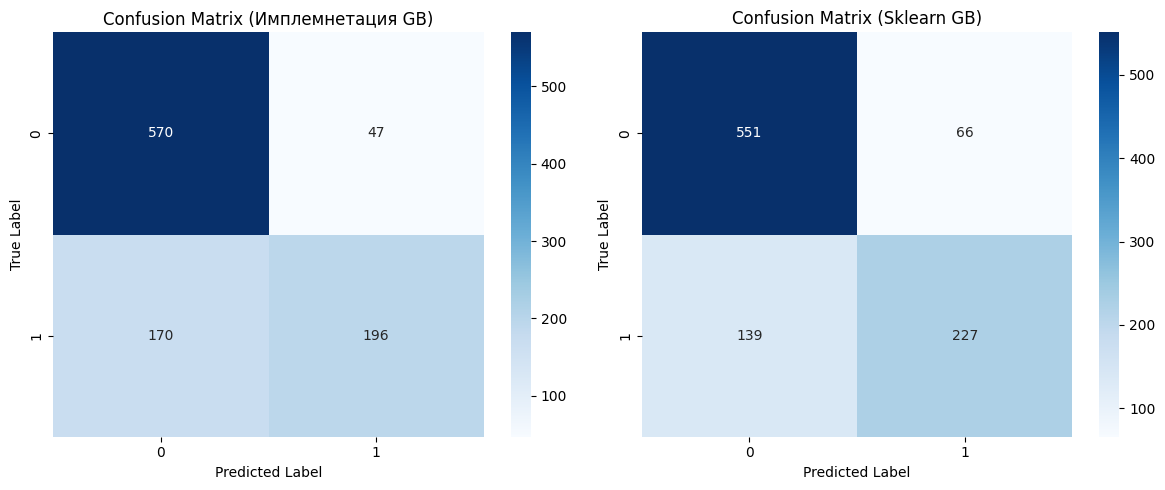

In [ ]:
# визуализация матриц ошибок
cm_matrix_cu = confusion_matrix(y_test_water_cu, y_pred_water_cu)
cm_matrix_sklearn = confusion_matrix(y_test_water_cu, y_pred_water_sklearn)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_matrix_cu, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (Имплемнетация GB)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
sns.heatmap(cm_matrix_sklearn, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix (Sklearn GB)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
plt.tight_layout()
plt.show()

*Метрики имплементации оказались ниже, но все равно близки к метрикам библиотеки, значит реализация корректна.*

Проверим модель регрессии на улучшенных данных и сравним с реализацией из sklearn.


Метрики собственной реализации Gradient Boosting Regressor:
  MAE:   2.9476
  MSE:   18.3832
  RMSE:  4.2876
  R²:    0.9321

Метрики sklearn Gradient Boosting Regressor:
  MAE:   2.9467
  MSE:   18.4436
  RMSE:  4.2946
  R²:    0.9318


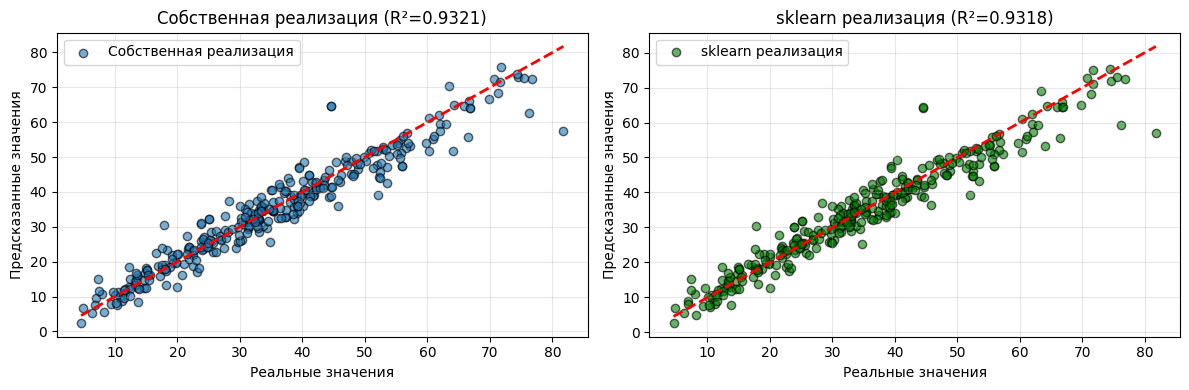

In [30]:
# обновим гиперпараметры для имплементации
custom_param_reg = {
    'n_estimators': best_params_reg['n_estimators'],
    'learning_rate': best_params_reg['learning_rate'],
    'max_depth': best_params_reg['max_depth'],
    'min_samples_split': best_params_reg['min_samples_split'],
    'min_samples_leaf': best_params_reg['min_samples_leaf']
}

# обучим имплементацию с новыми гиперпараметрами
gb_reg_cu = GradientBoostingRegressorCustom(random_state=42, **custom_param_reg)
gb_reg_cu.fit(X_train_concrete_fe, y_train_concrete_fe)
y_pred_concrete_fe = gb_reg_cu.predict(X_test_concrete_fe)

# обучим sklearn с новыми гиперпараметрами
gb_reg_sklearn = GradientBoostingRegressor(random_state=42, **custom_param_reg)
gb_reg_sklearn.fit(X_train_concrete_fe, y_train_concrete_fe)
y_pred_concrete_sklearn = gb_reg_sklearn.predict(X_test_concrete_fe)

# вычисление метрик
mae_cu = mean_absolute_error(y_test_concrete_fe, y_pred_concrete_fe)
mse_cu = mean_squared_error(y_test_concrete_fe, y_pred_concrete_fe)
rmse_cu = np.sqrt(mse_cu)
r2_cu = r2_score(y_test_concrete_fe, y_pred_concrete_fe)

mae_sklearn = mean_absolute_error(y_test_concrete_fe, y_pred_concrete_sklearn)
mse_sklearn = mean_squared_error(y_test_concrete_fe, y_pred_concrete_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y_test_concrete_fe, y_pred_concrete_sklearn)

print("\nМетрики собственной реализации Gradient Boosting Regressor:")
print(f"  MAE:   {mae_cu:.4f}")
print(f"  MSE:   {mse_cu:.4f}")
print(f"  RMSE:  {rmse_cu:.4f}")
print(f"  R²:    {r2_cu:.4f}")
print("\nМетрики sklearn Gradient Boosting Regressor:")
print(f"  MAE:   {mae_sklearn:.4f}")
print(f"  MSE:   {mse_sklearn:.4f}")
print(f"  RMSE:  {rmse_sklearn:.4f}")
print(f"  R²:    {r2_sklearn:.4f}")



fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# собственная реализация
axes[0].scatter(y_test_concrete_fe, y_pred_concrete_fe, alpha=0.6, edgecolors='k', label='Собственная реализация')
axes[0].plot([y_test_concrete_fe.min(), y_test_concrete_fe.max()], 
             [y_test_concrete_fe.min(), y_test_concrete_fe.max()], 'r--', lw=2)
axes[0].set_xlabel('Реальные значения')
axes[0].set_ylabel('Предсказанные значения')
axes[0].set_title(f'Собственная реализация (R²={r2_cu:.4f})')
axes[0].grid(alpha=0.3)
axes[0].legend()

# sklearn реализация
axes[1].scatter(y_test_concrete_fe, y_pred_concrete_sklearn, alpha=0.6, edgecolors='k', color='green', label='sklearn реализация')
axes[1].plot([y_test_concrete_fe.min(), y_test_concrete_fe.max()], 
             [y_test_concrete_fe.min(), y_test_concrete_fe.max()], 'r--', lw=2)
axes[1].set_xlabel('Реальные значения')
axes[1].set_ylabel('Предсказанные значения')
axes[1].set_title(f'sklearn реализация (R²={r2_sklearn:.4f})')
axes[1].grid(alpha=0.3)
axes[1].legend()
plt.tight_layout()
plt.show()

*Метрики почти совпали, значит наша реализация работает корректно.*

### 4j. Выводы

В данной лабораторной работе была реализована модель градиентного бустинга для задач классификации и регрессии. Реализация была проверена на сырых и улучшенных данных, и показала результаты, близкие к реализации из библиотеки sklearn, что подтверждает ее корректность.

**Опишем логику для градиентного бустинга для классификации**:  

Модель последовательно строит слабые регрессионные деревья, каждое из которых обучается предсказывать антиградиент логистической функции потерь (остатки — разность между истинными метками и предсказанными вероятностями). Итоговое предсказание получается применением сигмоиды к сумме всех деревьев, что даёт вероятность принадлежности к классу.

**Опишем логику для градиентного бустинга для регрессии**:  

Модель последовательно строит слабые регрессионные деревья, каждое из которых обучается предсказывать остатки — разность между истинными значениями и текущим предсказанием модели. Итоговое предсказание — сумма начального значения (среднее по обучающей выборке) и всех поправок от деревьев, взятых с шагом обучения.

Градиентный бустинг показал наилучшие метрики на улучшенных данных по сравнению с остальными моделями машиного обучения.

# Общие выводы по всем лабораторным работам

В ходе выполения лабораторных работ я осознал, насколько важна тщательная предобработка данных, даже мощные модели машинного обучения сильно зависят от качества входных данных. Я научился применять различные методы обработки данных, такие как заполнение пропусков, масштабирование признаков и создание новых признаков, что значительно улучшило результаты моделей. Кроме того, я понял важность подбора гиперпараметров для оптимизации производительности моделей. Также стоит отметить, что удаление выбросов не всегда приводит к улучшению качества моделей, иногда выбросы содержат полезную информацию.

Реализация алгоритмов с нуля помогла мне глубже понять их внутреннюю работу и механизмы обучения. Важно отметить, что имплементация моделей часто не превосходит по скорости и качеству оптимизированные библиотеки, такие как scikit-learn.

Рассмотрим метрики классификации всех моделей (улучшенный бейзлайн):
| Модель                  | Accuracy | F1-Score | ROC-AUC | PR-AUC |
|------------------------|----------|----------|---------|--------|
| KNN             | 0.6663   | 0.4891   | 0.6180  | 0.6052 |
| LogisticRegression | 0.5646 | 0.4965 | 0.6141 | 0.4988 |
| DecisionTree    | 0.7609   | 0.6129   | 0.8306  | 0.7760 |
| RandomForest    | 0.7823   | 0.6825   | 0.8695  | 0.8209 |
| GradientBoosting| 0.7915   | 0.6889   | 0.8706  | 0.8246 |

Рассмотрим метрики регрессии всех моделей (улучшенный бейзлайн):
| Модель                  | MAE    | MSE     | R²     |
|------------------------|--------|---------|--------|
| KNN             | 5.7491 | 55.1047 | 0.7963 |
| LinearRegression | 5.7506 | 57.8247 | 0.7863 |
| DecisionTree    | 3.9894 | 36.0223 | 0.8669 |
| RandomForest    | 3.3975 | 25.2269 | 0.9068 |
| GradientBoosting| 2.9555 | 17.7237 | 0.9345 |

**Подведем итог по всем моделям**

На улучшенных данных (без пропусков и с предобработкой) все модели показали стабильную работу, однако их эффективность существенно различается в зависимости от задачи — классификации или регрессии. 

В **классификации** наилучшие результаты продемонстрировали ансамблевые методы: **Random Forest** и **Gradient Boosting**, которые превзошли остальные модели по всем ключевым метрикам — точности (Accuracy ~0.78–0.79), балансированной F1-мере (F1 ~0.68–0.69), а также по качеству ранжирования (ROC-AUC > 0.87 и PR-AUC > 0.82), что говорит о хорошей способности выделять положительный класс даже при несбалансированных данных. Линейные и простые модели (KNN, LogisticRegression) оказались менее эффективными, особенно по F1 и PR-AUC, что указывает на их слабую адаптацию к нелинейным зависимостям и дисбалансу классов. 

В **регрессии** ситуация аналогична: ансамбли (Random Forest и Gradient Boosting) снова лидируют — они обеспечивают минимальную ошибку (MAE ≈ 2.96–3.40, MSE ≈ 17.7–25.2) и максимальную объяснённую дисперсию (R² > 0.90–0.93), что означает высокую точность прогноза и хорошее соответствие реальным значениям. Линейная регрессия и KNN показывают заметно худшие результаты, подтверждая их ограниченность для сложных нелинейных зависимостей. 

Таким образом, **ансамблевые методы (особенно Gradient Boosting) являются оптимальным выбором как для классификации, так и для регрессии на данном наборе данных**, поскольку они лучше всего учитывают нелинейности, шум и структуру признаков, обеспечивая наиболее точные и устойчивые предсказания.